In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

weatherdf=pd.read_csv('../day1_temperature/data/daegu-utf8.csv')
print(weatherdf.columns)

weatherdf.columns=['날짜',	'지점',	'평균기온',	'최저기온',	'최고기온']
print(weatherdf.columns)

# datetime
weatherdf['날짜']=pd.to_datetime(weatherdf['날짜'],format='%Y-%m-%d')
print(weatherdf['날짜'].dtype)

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')
Index(['날짜', '지점', '평균기온', '최저기온', '최고기온'], dtype='object')
datetime64[ns]


In [53]:
print(weatherdf.shape)
num_rows=weatherdf.shape[0] 
num_missing=num_rows-weatherdf.count() # count():정상값의 개수
print(num_missing)

(43071, 5)
날짜        1
지점        1
평균기온    703
최저기온    630
최고기온    632
dtype: int64


In [54]:
weatherdf=weatherdf.dropna(axis=0)
print(weatherdf.count())

# 결측치 제거한 파일을 쓰기 모드로 저장
weatherdf.to_csv('daegu-utf8-df.csv',index=False,mode='w',encoding='utf-8-sig')

날짜      42365
지점      42365
평균기온    42365
최저기온    42365
최고기온    42365
dtype: int64


In [55]:
# 특정 연도와 월의 최고/최저 기온 평균값 계산 

# datetime 객체 접근 : dt.year, dt.month, dt.day

print('[특정 연도와 달의 최고, 최저 기온 평균값 계산]')
year_df=weatherdf[weatherdf['날짜'].dt.year==2024]
month_df=year_df[year_df['날짜'].dt.month==1]

# 반올림 하는 round(데이터,반올림할 자릿수) 함수
max_temp_mean=round(month_df['최고기온'].mean(),1)
min_temp_mean=round(month_df['최고기온'].mean(),1)
print(f'2023년 8월 최저기온 평균:{min_temp_mean}, 최고기온 평균 :{max_temp_mean}')

weather_df=pd.read_csv('data/daegu-utf8.csv',encoding='utf-8-sig')

[특정 연도와 달의 최고, 최저 기온 평균값 계산]
2023년 8월 최저기온 평균:7.6, 최고기온 평균 :7.6


1990년대 8월 최고 기온 평균 : [np.float64(33.9), np.float64(28.3), np.float64(29.0), np.float64(27.0), np.float64(34.5), np.float64(34.0), np.float64(32.3), np.float64(30.9), np.float64(30.1), np.float64(29.1)]
2010년대 8월 최고 기온 평균 : [np.float64(33.6), np.float64(30.3), np.float64(32.4), np.float64(34.4), np.float64(28.8), np.float64(31.2), np.float64(33.2), np.float64(31.4), np.float64(32.9), np.float64(32.2)]
1990년대 8월 전체 최고 기온 평균 : 30.9
2010년대 8월 전체 최고 기온 평균 : 32.0


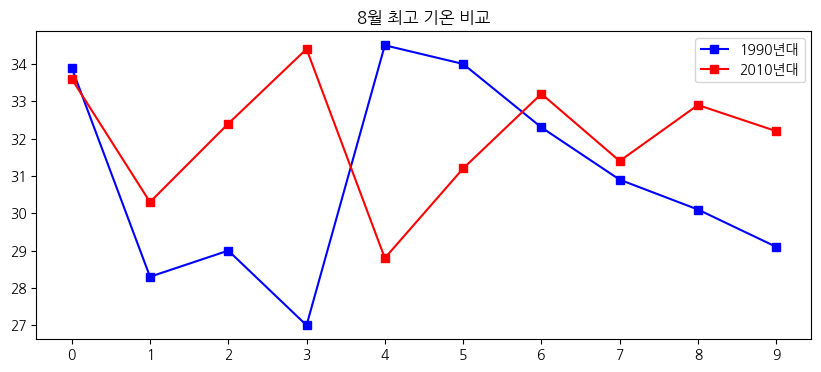

In [56]:
# 1990년대와 2010년대 최고 기온 비교

def draw_two_plots(title,x_data,max_temp_list1,label_y1,max_temp_list2,label_y2):
    
    plt.rcParams['axes.unicode_minus']=False
    plt.figure(figsize=(10,	4))
    plt.plot(x_data,max_temp_list1,marker='s',markersize=6,color='b',label=label_y1)
    plt.plot(x_data,max_temp_list2,marker='s',markersize=6,color='r',label=label_y2)
    plt.xticks(x_data)	
    
    plt.title(title)
    plt.legend()
    plt.show()		


def main():
    search_month=int(input("비교할 월 입력 : "))
    
    weather_df=pd.read_csv('../day1_temperature/daegu-utf8-df.csv',encoding='utf-8-sig')
    weather_df['날짜']=pd.to_datetime(weather_df['날짜'],format='%Y-%m-%d')
    
    first_decade_max_temp_list=[0]*10
    second_decade_max_temp_list=[0]*10
    
    first_decade=1990
    second_decade=2010
    
    for year in range(10):
        first_decade_df=weather_df[(weather_df['날짜'].dt.year==first_decade+year) & 
                                   (weather_df['날짜'].dt.month==search_month)]
        first_decade_max_temp_list[year]=round(first_decade_df['최고기온'].mean(),1)
        
        second_decade_df=weather_df[(weather_df['날짜'].dt.year==second_decade+year) & 
                                   (weather_df['날짜'].dt.month==search_month)]
        second_decade_max_temp_list[year]=round(second_decade_df['최고기온'].mean(),1)
    
    print(f'{first_decade}년대 {search_month}월 최고 기온 평균 : {first_decade_max_temp_list}')
    print(f'{second_decade}년대 {search_month}월 최고 기온 평균 : {second_decade_max_temp_list}')
    
    first_decade_high_temp_mean=round(sum(first_decade_max_temp_list)/len(first_decade_max_temp_list),1)
    second_decade_high_temp_mean=round(sum(second_decade_max_temp_list)/len(second_decade_max_temp_list),1)
    
    print(f'{first_decade}년대 {search_month}월 전체 최고 기온 평균 : {first_decade_high_temp_mean}')
    print(f'{second_decade}년대 {search_month}월 전체 최고 기온 평균 : {second_decade_high_temp_mean}')
    
    x_data=[i for i in range(10)]
    draw_two_plots(f'{search_month}월 최고 기온 비교', x_data,
                   first_decade_max_temp_list,str(first_decade)+'년대',
                   second_decade_max_temp_list,str(second_decade)+'년대')
    

main()